# Principal Component Ananlysis

PCA is a method that rotates the dataset in a way such that the rotated features are statistically uncorrelated. This rotation is often followed by selecting only a subset of the new features, according to how important they are for explaining the data.

## Illustration of PCA

In [12]:
%matplotlib inline

import numpy as np
import scipy as sp
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import matplotlib
import mglearn
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

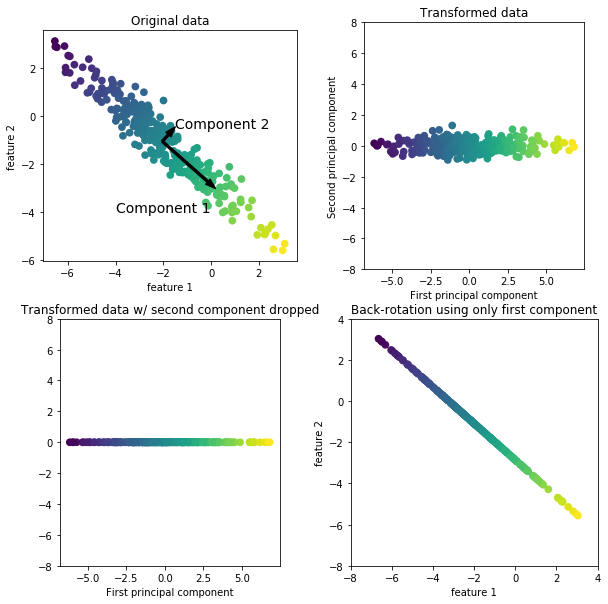

In [8]:
mglearn.plots.plot_pca_illustration()

One of the most common applications of PCA is visualization high-dimensional datasets. 

## Applying PCA to the cancer dataset for visualization

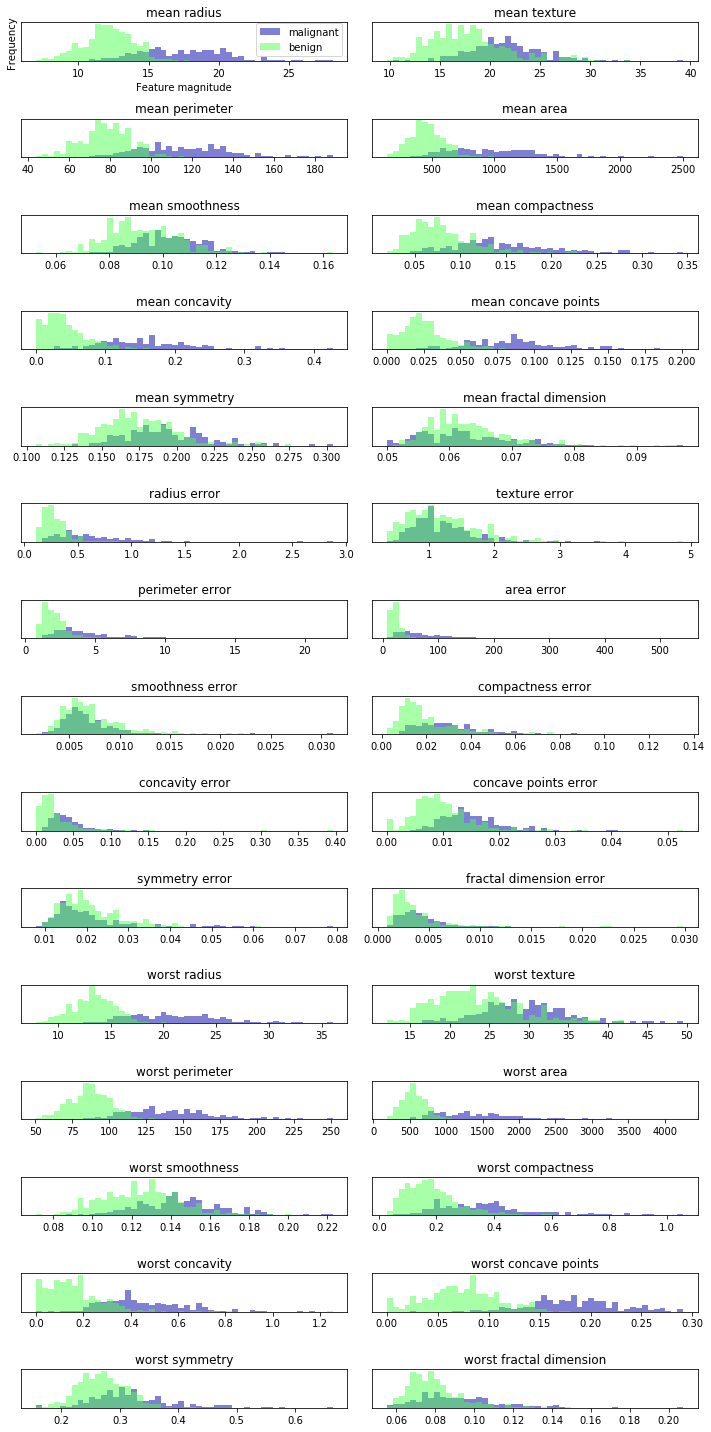

In [17]:
fig, axes = plt.subplots(15,2,figsize=(10,20))
malignant = cancer.data[cancer.target ==0]
benign = cancer.data[cancer.target ==1 ]

ax = axes.ravel()

for i in range(30):
    _,bins = np.histogram(cancer.data[:,i],bins=50)
    ax[i].hist(malignant[:,i],bins=bins, color=mglearn.cm3(0), alpha=0.5)
    ax[i].hist(benign[:,i], bins=bins, color=mglearn.cm3(3),alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
    
ax[0].set_xlabel("Feature magnitude")
ax[0].set_ylabel("Frequency")
ax[0].legend(["malignant","benign"],loc="best")
fig.tight_layout()

Before we apply PCA, we scale our data so that each feature has unit variance using StandardScaler:

In [24]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
cancer = load_breast_cancer()

scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

In [29]:
from sklearn.decomposition import PCA
# keep the first two principal component fo the data
pca = PCA(n_components=2)

#fit PCA model to breast cancer data
pca.fit(X_scaled)

# transformed data onto the first two components
X_pca = pca.transform(X_scaled)
print("Original shape: {}".format(str(X_scaled.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))


Original shape: (569, 30)
Reduced shape: (569, 2)


Text(0,0.5,'Second principal component')

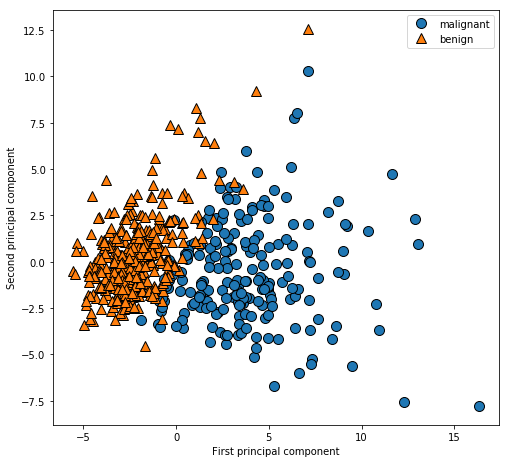

In [33]:
# plot first vs. second principal components, colored by class
plt.figure(figsize=(8,8))
mglearn.discrete_scatter(X_pca[:,0],X_pca[:,1],cancer.target)
plt.legend(cancer.target_names,loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")


The downside of PCA is that the two axes in the plot are often not very easy to interpret. The principal components correspond to directions in the orginal data, so they are combinations of the original features.  

In [35]:
print("PCA component shape: {}".format(pca.components_.shape))

PCA component shape: (2, 30)


In [40]:
print("PCA components:\n {}".format(pca.components_))

PCA components:
 [[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


We can also visualize the coefficients using a heat map.

Text(0,0.5,'Principal component')

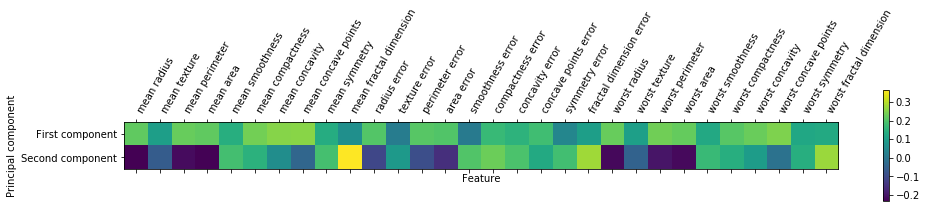

In [47]:
plt.matshow(pca.components_,cmap='viridis')
plt.yticks([0,1],["First component","Second component"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)),cancer.feature_names, rotation=60,ha="left")
plt.xlabel("Feature")
plt.ylabel("Principal component")
#plt.title("Heat map of the first two principal components on the Breast Cancer dataset")


## Application 2: Eigenfaces for feature extraction

Feature extraction

The idea behind feature extraction is that it is possible to find a representation fo your data that is better suited to analysis than the raw representation you were given.